In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Module 3 - Regression & Beta calculation

In [2]:
df = pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


### Query 3.1

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.

    Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
    
    Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.

The coefficients for the "Pred" column are : [ 2.  3. -1. -4.]
The coefficients for the "new" column are : [ 1.01293825 -1.0003835   1.00503772 -1.01765453]


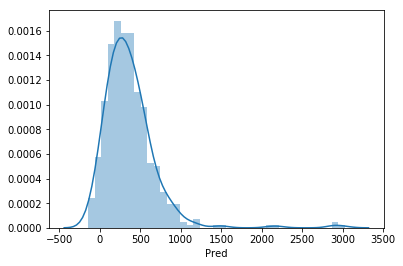

In [3]:
from sklearn.linear_model import LinearRegression

# Separate input and output varibles (and drop NaN's) for 'Pred' column
df_filtered = df.dropna()
X_pred = df_filtered[['Price', 'Open', 'High', 'Low']]
y_pred = df_filtered['Pred']

# Train a model for the 'Pred' column
reg1 = LinearRegression()
reg1.fit(X_pred, y_pred)
print('The coefficients for the "Pred" column are : ' + str(reg1.coef_))

# Input and output variables for the 'new' column
X_new = df[['Price', 'Open', 'High', 'Low']]
y_new = df['new']

# Train a model for the 'new' column
reg2 = LinearRegression()
reg2.fit(X_new, y_new)
print('The coefficients for the "new" column are : ' + str(reg2.coef_))

 # Replace NaN's in 'Pred' column with correct values calculated through regression
preds = reg1.predict(df[['Price', 'Open', 'High', 'Low']])
fill_values = pd.Series(preds)
df['Pred'].fillna(fill_values, inplace=True)

# Just to confirm, we will plot a distplot to see any exceptions
sns.distplot(df['Pred'])

### Query 3.2

Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -

    The daily Beta value for the past 3 months. (Daily= Daily returns)
    The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.

Attempt the question using regression.(Regression Reference) 

In [4]:
from datetime import timedelta as td

# Load nifty and any random stock
nifty = pd.read_csv('Nifty50/Nifty50.csv')
pvr = pd.read_csv('Small_Cap/LEMONTREE.csv')
pvr['Date'] = pd.to_datetime(pvr['Date'])
nifty['Date'] = pd.to_datetime(nifty['Date'])


delta = td(days=90)

# Calculate Beta for daily returns
nifty_day_pct = nifty[nifty['Date'] > nifty.iloc[-1]['Date'] - delta]['Close'].pct_change().reset_index(drop=True).dropna() * 100
y_day_pct = pvr[pvr['Date'] > pvr.iloc[-1]['Date'] - delta]['Close Price'].pct_change().reset_index(drop=True).dropna() * 100

reg_beta_day = LinearRegression()
reg_beta_day.fit(nifty_day_pct.values.reshape(-1, 1), y_day_pct)

print('Beta (daily return) : {0}'.format(reg_beta_day.coef_[0]))

# Monthly beta value
nifty_month_pct = nifty[nifty['Date'] > nifty.iloc[-1]['Date'] - delta]['Close'].pct_change(30).reset_index(drop=True).dropna() * 100
y_month_pct = pvr[pvr['Date'] > pvr.iloc[-1]['Date'] - delta]['Close Price'].pct_change(30).reset_index(drop=True).dropna() * 100

reg_beta_month = LinearRegression()
reg_beta_month.fit(nifty_month_pct.values.reshape(-1,1), y_month_pct)
print('Beta (monthly return) : {0}'.format(reg_beta_month.coef_[0]))

Beta (daily return) : 0.591932865583419
Beta (monthly return) : 2.1140545643211115


### Beta Value

The beta value of a stock tells us about the volatility of the stock when compared to a relatively stable equity such as an index fund. A positive beta value tells us that the stock will rise with the rise of the index and fall with its fall. The magnitude of the beta value represents the volatility of the equity.